Lambda School Data Science, Unit 2: Predictive Modeling

# Regression & Classification, Module 4


## Assignment

- [ ] Watch Aaron's [video #1](https://www.youtube.com/watch?v=pREaWFli-5I) (12 minutes) & [video #2](https://www.youtube.com/watch?v=bDQgVt4hFgY) (9 minutes) to learn about the mathematics of Logistic Regression.
- [ ] [Sign up for a Kaggle account](https://www.kaggle.com/), if you don’t already have one. Go to our Kaggle InClass competition website. You will be given the URL in Slack. Go to the Rules page. Accept the rules of the competition.
- [ ] Do train/validate/test split with the Tanzania Waterpumps data.
- [ ] Begin with baselines for classification.
- [ ] Use scikit-learn for logistic regression.
- [ ] Get your validation accuracy score.
- [ ] Submit your predictions to our Kaggle competition. (Go to our Kaggle InClass competition webpage. Use the blue **Submit Predictions** button to upload your CSV file. Or you can use the Kaggle API to submit your predictions.)
- [ ] Commit your notebook to your fork of the GitHub repo.

---


## Stretch Goals

- [ ] Add your own stretch goal(s) !
- [ ] Clean the data. For ideas, refer to [The Quartz guide to bad data](https://github.com/Quartz/bad-data-guide),  a "reference to problems seen in real-world data along with suggestions on how to resolve them." One of the issues is ["Zeros replace missing values."](https://github.com/Quartz/bad-data-guide#zeros-replace-missing-values)
- [ ] Make exploratory visualizations.
- [ ] Do one-hot encoding. For example, you could try `quantity`, `basin`, `extraction_type_class`, and more. (But remember it may not work with high cardinality categoricals.)
- [ ] Do [feature scaling](https://scikit-learn.org/stable/modules/preprocessing.html).
- [ ] Get and plot your coefficients.
- [ ] Try [scikit-learn pipelines](https://scikit-learn.org/stable/modules/compose.html).

---

## Data Dictionary 

### Features

Your goal is to predict the operating condition of a waterpoint for each record in the dataset. You are provided the following set of information about the waterpoints:

- `amount_tsh` : Total static head (amount water available to waterpoint)
- `date_recorded` : The date the row was entered
- `funder` : Who funded the well
- `gps_height` : Altitude of the well
- `installer` : Organization that installed the well
- `longitude` : GPS coordinate
- `latitude` : GPS coordinate
- `wpt_name` : Name of the waterpoint if there is one
- `num_private` :  
- `basin` : Geographic water basin
- `subvillage` : Geographic location
- `region` : Geographic location
- `region_code` : Geographic location (coded)
- `district_code` : Geographic location (coded)
- `lga` : Geographic location
- `ward` : Geographic location
- `population` : Population around the well
- `public_meeting` : True/False
- `recorded_by` : Group entering this row of data
- `scheme_management` : Who operates the waterpoint
- `scheme_name` : Who operates the waterpoint
- `permit` : If the waterpoint is permitted
- `construction_year` : Year the waterpoint was constructed
- `extraction_type` : The kind of extraction the waterpoint uses
- `extraction_type_group` : The kind of extraction the waterpoint uses
- `extraction_type_class` : The kind of extraction the waterpoint uses
- `management` : How the waterpoint is managed
- `management_group` : How the waterpoint is managed
- `payment` : What the water costs
- `payment_type` : What the water costs
- `water_quality` : The quality of the water
- `quality_group` : The quality of the water
- `quantity` : The quantity of water
- `quantity_group` : The quantity of water
- `source` : The source of the water
- `source_type` : The source of the water
- `source_class` : The source of the water
- `waterpoint_type` : The kind of waterpoint
- `waterpoint_type_group` : The kind of waterpoint

### Labels

There are three possible values:

- `functional` : the waterpoint is operational and there are no repairs needed
- `functional needs repair` : the waterpoint is operational, but needs repairs
- `non functional` : the waterpoint is not operational

--- 

## Generate a submission

Your code to generate a submission file may look like this:

```python
# estimator is your model or pipeline, which you've fit on X_train

# X_test is your pandas dataframe or numpy array, 
# with the same number of rows, in the same order, as test_features.csv, 
# and the same number of columns, in the same order, as X_train

y_pred = estimator.predict(X_test)


# Makes a dataframe with two columns, id and status_group, 
# and writes to a csv file, without the index

sample_submission = pd.read_csv('sample_submission.csv')
submission = sample_submission.copy()
submission['status_group'] = y_pred
submission.to_csv('your-submission-filename.csv', index=False)
```

If you're working locally, the csv file is saved in the same directory as your notebook.

If you're using Google Colab, you can use this code to download your submission csv file.

```python
from google.colab import files
files.download('your-submission-filename.csv')
```

---

In [1]:
import os, sys
# in_colab = 'google.colab' in sys.modules

# # If you're in Colab...
# if in_colab:
#     # Pull files from Github repo
#     os.chdir('/content')
#     !git init .
#     !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
#     !git pull origin master
    
#     # Install required python packages
#     !pip install -r requirements.txt
    
#     # Change into directory for module
#     os.chdir('module4')

In [142]:
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [7]:
def df_stats(dataframe):
    try:
        display(dataframe.shape,dataframe.head(),dataframe.isna().sum(),dataframe.dtypes,dataframe.count(),dataframe.describe(),dataframe.describe(exclude="number"))
    except:
        display(dataframe.shape,dataframe.head(),dataframe.isna().sum(),dataframe.dtypes,dataframe.count(),dataframe.describe())
        
def h(dataframe,*args):
    return display(dataframe.head(*args),dataframe.shape)

In [100]:
# Read the Tanzania Waterpumps data
# train_features.csv : the training set features
# train_labels.csv : the training set labels
# test_features.csv : the test set features
# sample_submission.csv : a sample submission file in the correct format
    
import pandas as pd

train_features = pd.read_csv('../data/waterpumps/train_features.csv')
train_labels = pd.read_csv('../data/waterpumps/train_labels.csv')
test_features = pd.read_csv('../data/waterpumps/test_features.csv')
sample_submission = pd.read_csv('../data/waterpumps/sample_submission.csv')

assert train_features.shape == (59400, 40)
assert train_labels.shape == (59400, 2)
assert test_features.shape == (14358, 40)
assert sample_submission.shape == (14358, 2)

In [101]:
pd.set_option('display.max_columns', None)

# Data Cleaning / Feature Engineering

In [102]:
#converting categories names to numbers  
 
mapping = {'functional':0 , 'functional needs repair': 1, 'non functional': 2 }
mapping

{'functional': 0, 'functional needs repair': 1, 'non functional': 2}

In [103]:
train_labels["status_group"] = train_labels["status_group"].map(mapping)

In [104]:
train_labels["status_group"].value_counts(normalize=True)

0    0.543081
2    0.384242
1    0.072677
Name: status_group, dtype: float64

In [ ]:
#one-hot encoding the two columns with binary outcomes 

In [109]:
import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names=True)
train_features["public_meeting"] = encoder.fit_transform(train_features["public_meeting"])
train_features["permit"] = encoder.fit_transform(train_features["permit"])

In [ ]:
test_features["public_meeting"]

In [136]:
#have to run one-hot encoder one line at a time. !ask about this!

import category_encoders as ce
encoder = ce.OneHotEncoder(use_cat_names=True)
test_features["public_meeting"] = encoder.fit_transform(test_features["public_meeting"])
test_features["permit"] = encoder.fit_transform(test_features["permit"])

In [170]:
h(train_labels)

,id,status_group
0,69572,0
1,8776,0
2,34310,0
3,67743,2
4,19728,0


(59400, 2)

# Features worthy of one-hot encoding later

In [27]:
# one_hot_encode = "extraction_type","installer","scheme management","management","never_pay","source_class","water quality","quantity","permit","public_meeting", 

# Stats - Exploratory 

In [111]:
df_stats(train_features)

(59400, 40)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,1,GeoData Consultants Ltd,VWC,Roman,1,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,0,GeoData Consultants Ltd,Other,NaN,0,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,1,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,0,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,1,GeoData Consultants Ltd,VWC,NaN,0,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,1,GeoData Consultants Ltd,NaN,NaN,0,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting               0
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                       0
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting             int64
recorded_by               object
scheme_management         object
scheme_name               object
permit                     int64
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

id                       59400
amount_tsh               59400
date_recorded            59400
funder                   55765
gps_height               59400
installer                55745
longitude                59400
latitude                 59400
wpt_name                 59400
num_private              59400
basin                    59400
subvillage               59029
region                   59400
region_code              59400
district_code            59400
lga                      59400
ward                     59400
population               59400
public_meeting           59400
recorded_by              59400
scheme_management        55523
scheme_name              31234
permit                   59400
construction_year        59400
extraction_type          59400
extraction_type_group    59400
extraction_type_class    59400
management               59400
management_group         59400
payment                  59400
payment_type             59400
water_quality            59400
quality_

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,public_meeting,permit,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,0.858771,0.294478,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,0.348261,0.455812,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,1.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1.000000,0.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,1.000000,1.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,1.000000,1.000000,2013.000000


,date_recorded,funder,installer,wpt_name,basin,subvillage,region,lga,ward,recorded_by,scheme_management,scheme_name,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,55765,55745,59400,59400,59029,59400,59400,59400,59400,55523,31234,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,356,1897,2145,37400,9,19287,21,125,2092,1,12,2696,18,13,7,12,5,7,7,8,6,5,5,10,7,3,7,6
top,2011-03-15,Government Of Tanzania,DWE,none,Lake Victoria,Madukani,Iringa,Njombe,Igosi,GeoData Consultants Ltd,VWC,K,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,572,9084,17402,3563,10248,508,5294,2503,307,59400,36793,682,26780,26780,26780,40507,52490,25348,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


In [22]:
train_features["source_class"].value_counts(normalize=True)

groundwater    0.770943
surface        0.224377
unknown        0.004680
Name: source_class, dtype: float64

In [25]:
df_stats(train_labels)

(59400, 2)

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


id              0
status_group    0
dtype: int64

id               int64
status_group    object
dtype: object

id              59400
status_group    59400
dtype: int64

,id
count,59400.000000
mean,37115.131768
std,21453.128371
min,0.000000
25%,18519.750000
50%,37061.500000
75%,55656.500000
max,74247.000000


,status_group
count,59400
unique,3
top,functional
freq,32259


In [117]:
target = "status_group"
y_train = train_labels[target] 
val = y_train.value_counts(normalize=True)

In [118]:
majority_class = y_train.mode()[0]
y_pred = [majority_class] * len(y_train)

In [119]:
1 - val[0] #this is how much we got wrong by utilizing the mode as the baseline

0.45691919191919195

### Accuracy - if we predicted majority class 

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred)

0.543080808080808

In [120]:
y_val = train_labels[target]
y_pred = [majority_class] * len(y_val)
accuracy_score(y_pred, y_val)

0.543080808080808

# Linear Regression

In [138]:
# 1. Import estimator class
from sklearn.linear_model import LinearRegression

# 2. Instantiate this class
linear_reg = LinearRegression()

# 3. Arrange X feature matrices (already did y target vectors)
features = ['amount_tsh', 'population', 'public_meeting','permit']
X_train = train_features[features]
X_val = test_features[features]

# Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train)
X_val_imputed = imputer.transform(X_val)

# 4. Fit the model
linear_reg.fit(X_train_imputed, y_train)

# 5. Apply the model to new data.
# The predictions look like this ...
linear_reg.predict(X_train_imputed)

array([0.76145954, 0.9869599 , 0.80218692, ..., 0.86252741, 0.81157327,
       0.80618434])

In [139]:
pd.Series(linear_reg.coef_, features)

amount_tsh       -0.000016
population       -0.000036
public_meeting   -0.185446
permit            0.050954
dtype: float64

In [140]:
#Clearly this isn't possible, given, that 0 is the lowest possible prediction!

test_case = [[350000, 30500.000000, 1.000000,1.000000]]  # 1st class, 5-year old, Rich
linear_reg.predict(test_case)

array([-5.9004173])

### Logistic Regression - Intro

In [152]:
#logistic regression improved score with the features I chose by the tiniest margin. strange?

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='lbfgs')
log_reg.fit(X_train_imputed, y_train)
print('Validation Accuracy', log_reg.score(X_train_imputed, y_val))

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Validation Accuracy 0.5442087542087543


In [145]:
log_reg.predict(X_val_imputed)

array([0, 0, 0, ..., 0, 0, 0])

In [146]:
log_reg.predict_proba(X_val_imputed)

array([[0.52318449, 0.07293661, 0.4038789 ],
       [0.52281282, 0.0729714 , 0.40421578],
       [0.5523314 , 0.07273288, 0.37493572],
       ...,
       [0.54710716, 0.07323531, 0.37965753],
       [0.52015581, 0.07322024, 0.40662396],
       [0.51820494, 0.07340304, 0.40839202]])

In [147]:
log_reg.predict(test_case)

array([0])

In [148]:
log_reg.predict_proba(test_case)

array([[9.99360979e-01, 6.39020762e-04, 1.57179298e-51]])

In [149]:
# What's the math?
log_reg.coef_

array([[ 2.43844366e-04,  7.26289654e-05,  3.27247793e-01,
        -1.03947018e-01],
       [-1.17078815e-05, -2.38100609e-05,  6.37586922e-02,
        -8.06306938e-04],
       [-3.27466293e-04, -6.57210324e-05, -2.82716014e-01,
         1.10980522e-01]])

In [150]:
pd.Series(linear_reg.coef_, features)

amount_tsh       -0.000016
population       -0.000036
public_meeting   -0.185446
permit            0.050954
dtype: float64

# Logistic Regression for real

In [162]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler

target = "status_group"
features = ["amount_tsh","population",'public_meeting','permit']
X_train = train_features[features]
y_train = train_labels[target]
X_val = test_features[features]
# y_val = my_val[target]


encoder = ce.OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)

imputer = SimpleImputer()
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_val_imputed = imputer.transform(X_val_encoded)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_val_scaled = scaler.transform(X_val_imputed)

In [163]:
#appears a little higher!!

# model = LogisticRegressionCV(cv=5, n_jobs=-1, random_state=42)
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_scaled, y_train)
model.score(X_train_scaled, y_train)

/Users/user/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.5518350168350168

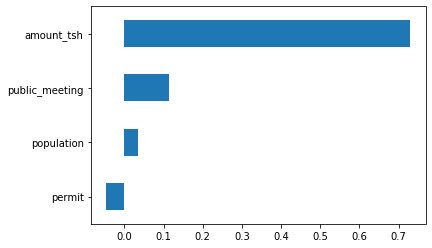

In [164]:
#amount_tsh is the only feature that plays a role in shaping the results

%matplotlib inline
coefficients = pd.Series(model.coef_[0], X_train_encoded.columns)
coefficients.sort_values().plot.barh();

In [166]:
X_test = test_features[features]
X_test_encoded = encoder.transform(X_test)
X_test_imputed = imputer.transform(X_test_encoded)
X_test_scaled = scaler.transform(X_test_imputed)
y_pred = model.predict(X_test_scaled)

print(y_pred)

[0 0 0 ... 0 0 0]


In [168]:
submission = test_features[["id"]]

In [171]:
submission["status_group"] = y_pred

/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [172]:
h(submission)

,id,status_group
0,50785,0
1,51630,0
2,17168,0
3,45559,2
4,49871,0


(14358, 2)

# Submission for Kaggle(TBD)

In [ ]:
submission['status_group'] = y_pred

In [56]:
submission = train_features[["id","date_recorded"]]

In [58]:
submission["status_group"] = y_pred

/Users/user/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
submission = submission.drop("date_recorded",axis=1)

0.543080808080808